<a href="https://colab.research.google.com/github/alcarvalhox/Projeto-Eddy-Current/blob/master/MiniVGGNet1_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[INFO] sampling images...
[INFO] loading pre-trained network...
[INFO] predicting...


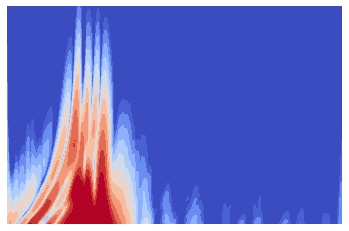

junta_isolada


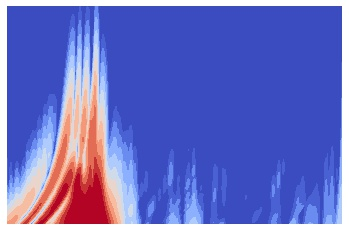

junta_isolada


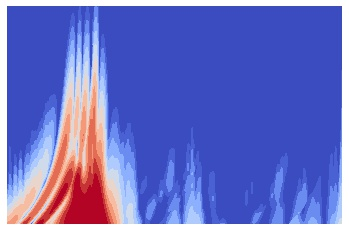

junta_isolada


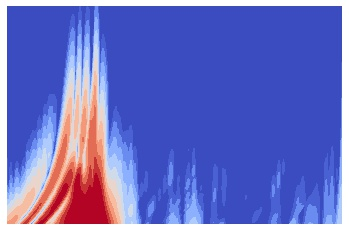

junta_isolada


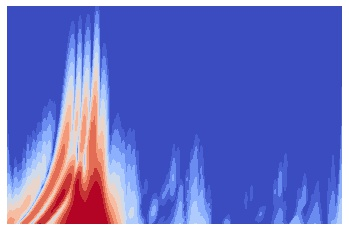

junta_isolada


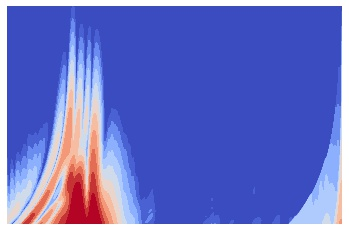

junta_isolada


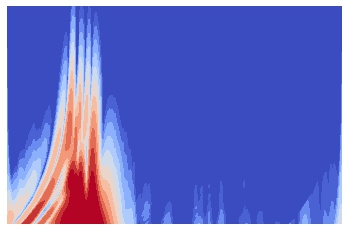

junta_isolada


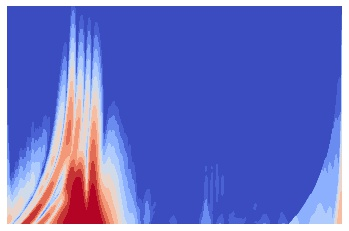

junta_isolada


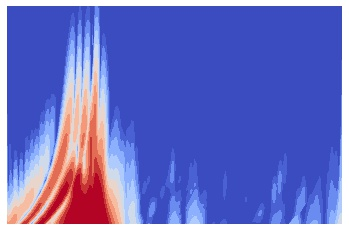

junta_isolada


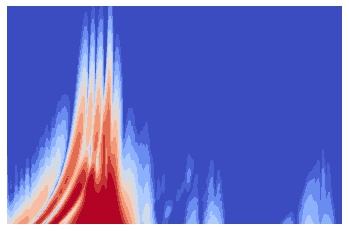

junta_isolada


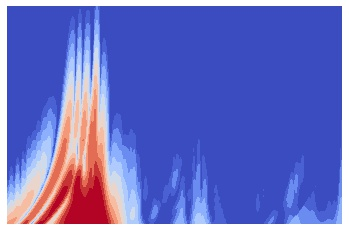

junta_isolada


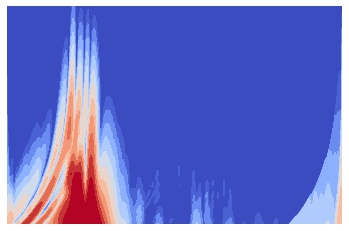

junta_isolada


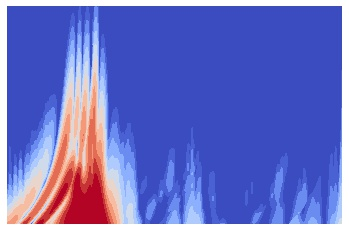

junta_isolada


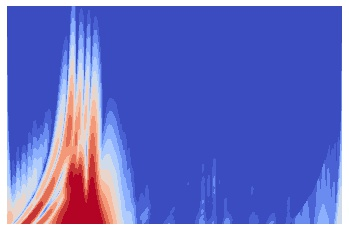

junta_isolada


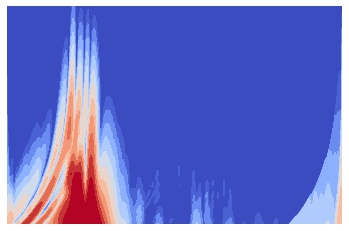

junta_isolada


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from pyimagesearch.preprocessing import ImageToArrayPreprocessor
#from pyimagesearch.preprocessing import SimplePreprocessor
#from pyimagesearch.datasets import SimpleDatasetLoader
#from pyimagesearch.nn.conv import ShallowNet
from imutils import paths
#import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import argparse
import cv2 
import os 
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
import pylab as pl
from google.colab import files
from google.colab.patches import cv2_imshow
from IPython.display import Image, display

import pandas as pd

import scipy.io
from scipy import signal
import seaborn as sns
import pywt
import csv

############################
# Transforma Imagem em array
############################
class ImageToArrayPreprocessor:
	def __init__(self, dataFormat=None):
		# store the image data format
		self.dataFormat = dataFormat

	def preprocess(self, image):
		# apply the Keras utility function that correctly rearranges
		# the dimensions of the image
		return img_to_array(image, data_format=self.dataFormat)

####################################################
# Faz o preprocessamento de imagens largura x altura
####################################################
class SimplePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# resize the image to a fixed size, ignoring the aspect
		# ratio
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)
  
###################################
# Carrega os dados e cria os labels
###################################
class SimpleDatasetLoader:
	def __init__(self, preprocessors=None):
		# store the image preprocessor
		self.preprocessors = preprocessors

		# if the preprocessors are None, initialize them as an
		# empty list
		if self.preprocessors is None:
			self.preprocessors = []

	def load(self, imagePaths, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split(os.path.sep)[-2]

			# check to see if our preprocessors are not None
			if self.preprocessors is not None:
				# loop over the preprocessors and apply each to
				# the image
				for p in self.preprocessors:
					image = p.preprocess(image)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))
  

#################################
# Faz a validação do modelo #####
#################################


# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#	help="path to input dataset")
#ap.add_argument("-m", "--model", required=True,
#	help="path to pre-trained model")
#args = vars(ap.parse_args())

# initialize the class labels
classLabels = ["junta_isolada","junta_seca", "solda"]
#classLabels = ["chef", "doctor", "engineer","farmer","firefighter","judge","mechanic","pilot","police","waiter"]
#imagePaths = list(paths.list_images("/content/drive/My Drive/idenprof/idenprof/validacao"))

# grab the list of images in the dataset then randomly sample
# indexes into the image paths list
#path_imagens = "/content/drive/My Drive/idenprof/idenprof/validacao"
print("[INFO] sampling images...")
#imagePaths = np.array(list(paths.list_images("/content/drive/My Drive/idenprof/idenprof/validacao")))
imagePaths = np.array(list(paths.list_images("/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS/test")))
idxs = np.random.randint(0, len(imagePaths), size=(15,))
imagePaths = imagePaths[idxs]


# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths)
data = data.astype("float") / 255.0

# load the pre-trained network
#path_modelo = "/content/drive/My Drive/idenprof/idenprof/models/weights.hdf5"
path_modelo = "/content/drive/My Drive/Projeto Eddy Current/Supervisionado/Figuras_Python_CNN/modelo/weights50.hdf5"
print("[INFO] loading pre-trained network...")
model = load_model(path_modelo)

# make predictions on the images
print("[INFO] predicting...")
preds = model.predict(data, batch_size=32).argmax(axis=1)



# loop over the sample images
for (i, imagePath) in enumerate(imagePaths):

  display(Image(imagePath))
  print(classLabels[preds[i]])

#from PIL import Image

#plt.figure(figsize=(10,10)) # specifying the overall grid size

#for i in range(25):
#for (i, imagePath) in enumerate(imagePaths):  
    #plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    #with open(filenames[i+1],'rb') as f:
      #image=Image.open(f)
			#plt.imshow(image)
      #plt.title(classLabels[preds[i]])
      #plt.close(image) 
#plt.show()
#image.close()



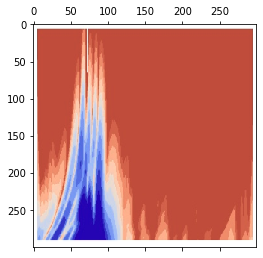

In [ ]:
import cv2

#img = cv2.imread(caminho, cv2.IMREAD_UNCHANGED)
width = 300
height = 300
dim = (width, height)
caminho = "/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS/test/"
imgc = caminho + "1.jpg"
img = cv2.imread(imgc)#, cv2.IMREAD_UNCHANGED)
resized = cv2.resize(img, dim)#, interpolation = cv2.INTER_AREA)
plt.matshow(resized)


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

